<a href="https://colab.research.google.com/github/Abdullahshatarh122/Diamond-price_ShAI/blob/main/final_diamond.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Geting data


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit


In [ ]:
data = pd.read_csv("/content/train.csv")
data_test = pd.read_csv("/content/test.csv")
data.head()

,Id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07
1,2,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51
2,3,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71
3,4,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19
4,5,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50


In [ ]:
data.drop('Id',axis=1,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43152 entries, 0 to 43151
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    43152 non-null  float64
 1   cut      43152 non-null  object 
 2   color    43152 non-null  object 
 3   clarity  43152 non-null  object 
 4   depth    43152 non-null  float64
 5   table    43152 non-null  float64
 6   price    43152 non-null  int64  
 7   x        43152 non-null  float64
 8   y        43152 non-null  float64
 9   z        43152 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.3+ MB


# Handling the data

In [ ]:
x=(data['x']==0).sum()
y=(data['y']==0).sum()
z=(data['z']==0).sum()
print('the number of zero in "x" coulumn is : ',x)
print('the number of zero in "y" coulumn is : ',y)
print('the number of zero in "z" coulumn is : ',z)

the number of zero in "x" coulumn is :  5
the number of zero in "y" coulumn is :  4
the number of zero in "z" coulumn is :  17


In [ ]:
data = data.drop(data[data["x"]==0].index)
data = data.drop(data[data["y"]==0].index)
data = data.drop(data[data["z"]==0].index)

In [ ]:
data.duplicated().sum()

97

In [ ]:
data.drop_duplicates(keep='first', inplace=True, ignore_index=False)
data.duplicated().sum()

0

In [ ]:
data.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

label encoding data

In [ ]:
label_encoded_data= data.copy()
#cut
label_encoded_data=data.copy()
cut_map={"Fair": 1 ,"Good": 2 ,"Very Good": 3 , "Premium": 4 , "Ideal": 5 }
encoded_cut = label_encoded_data['cut'].map(cut_map)
label_encoded_data['cut']=encoded_cut
#color
color_map={"J": 1 ,"I": 2 ,"H": 3 , "G": 4 , "F": 5 , "E": 6 , "D":7 }
encoded_color = label_encoded_data['color'].map(color_map)
label_encoded_data['color']=encoded_color
#clarity
clarity_map={"I1": 1 ,"SI2": 2 ,"SI1": 3 , "VS2": 4 , "VS1": 5 , "VVS2": 6 , "VVS1":7 , "IF":8}
encoded_clarity = label_encoded_data['clarity'].map(clarity_map)
label_encoded_data['clarity']=encoded_clarity

print(label_encoded_data.head())
# data_2=label_encoded_data.copy()

   carat  cut  color  clarity  depth  table  price     x     y     z
0   1.06    5      2        2   61.8   57.0   4270  6.57  6.60  4.07
1   1.51    4      4        6   60.9   58.0  15164  7.38  7.42  4.51
2   0.32    5      5        4   61.3   56.0    828  4.43  4.41  2.71
3   0.53    5      4        4   61.2   56.0   1577  5.19  5.22  3.19
4   0.70    4      3        6   61.0   57.0   2596  5.76  5.72  3.50


One hot encoded data

In [ ]:
one_hot_data = data.copy()
from sklearn.compose import ColumnTransformer
onehotencoder= OneHotEncoder()
# Define the ColumnTransformer
column_transformer = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['clarity', 'color','cut'])
    ],remainder='passthrough'  # Keep the remaining columns in the dataset
)
# Fit and transform the data
one_hot_data = column_transformer.fit_transform(data)
# Get feature names
ohe_feature_names = column_transformer.named_transformers_['cat'].get_feature_names_out(['clarity', 'color','cut'])
numerical_cols = ['carat' ,  'depth' , 'table' , 'price','x','y','z']
all_feature_names = list(ohe_feature_names)+numerical_cols


one_hot_data = pd.DataFrame(one_hot_data, columns=all_feature_names)
data_xgb = one_hot_data.copy()

# Visualizing the data

In [ ]:
data.describe()

,carat,depth,table,price,x,y,z
count,43038.000000,43038.000000,43038.000000,43038.000000,43038.000000,43038.000000,43038.000000
mean,0.797475,61.746582,57.459375,3928.189112,5.731744,5.735116,3.539926
std,0.472928,1.434702,2.233822,3982.731057,1.118784,1.146848,0.704559
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,948.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5311.750000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


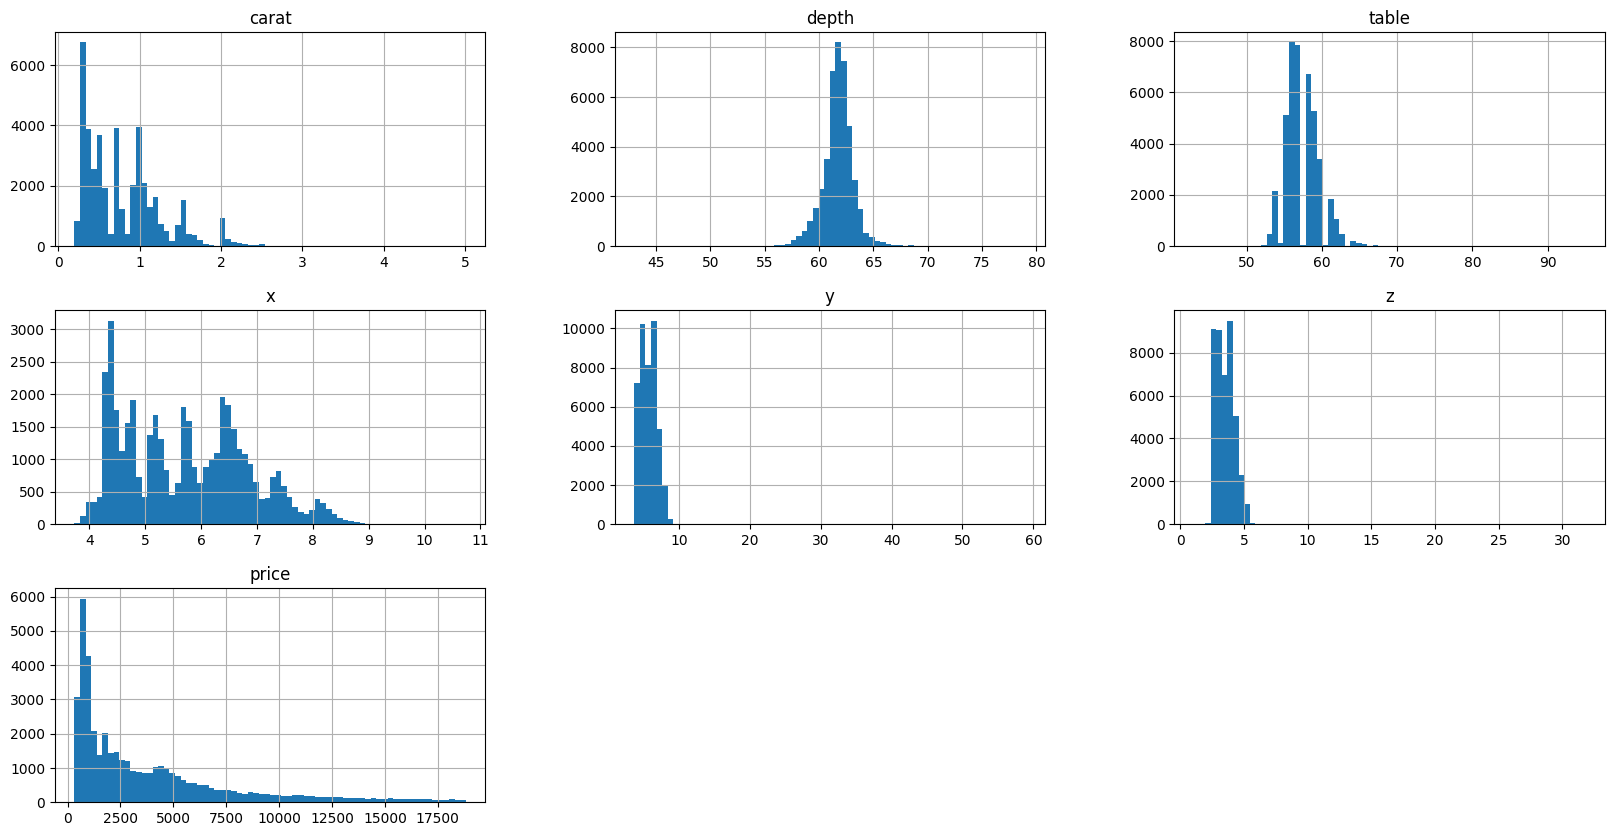

In [ ]:
data[['carat','depth','table','x','y','z','price']].hist(bins=70, figsize=(20,10))
plt.show()

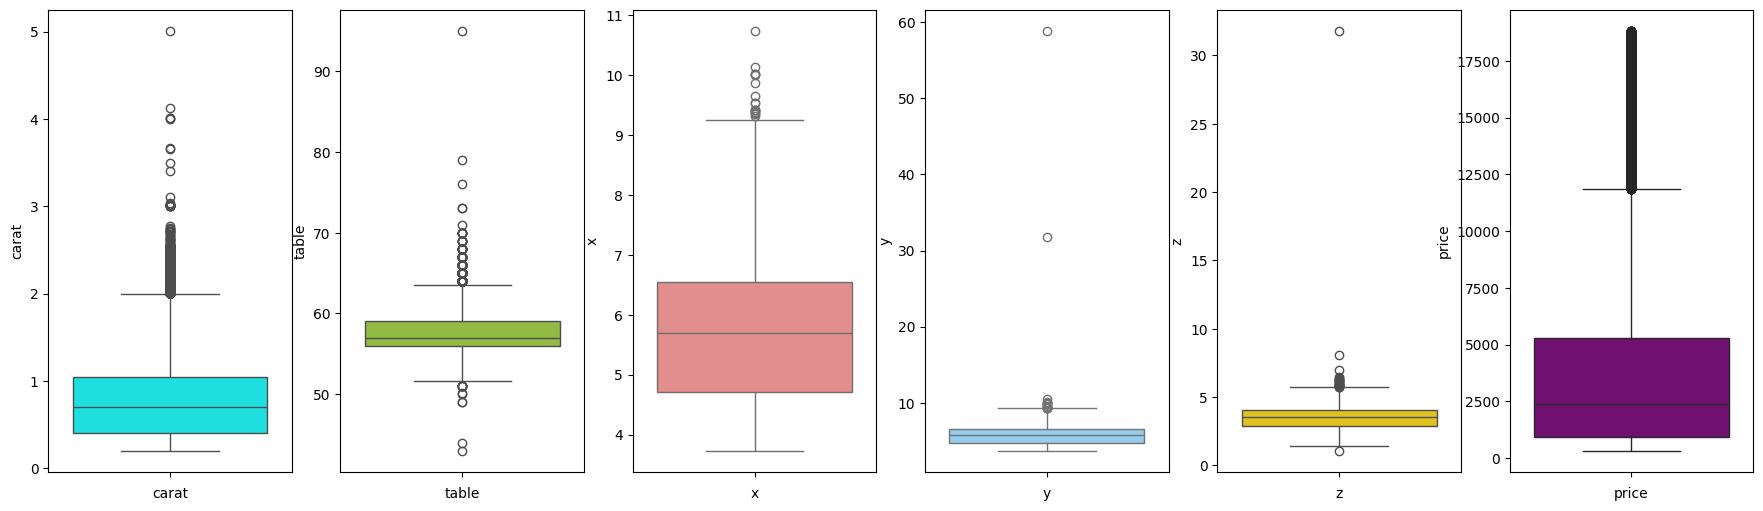

In [ ]:
columns = ['carat','table','x','y','z','price']
colors = ['Cyan','yellowgreen', 'lightcoral', 'lightskyblue','gold', 'purple']
fig, ax = plt.subplots(1, 6, figsize=(22, 6))

for i, column in enumerate(columns):
    sns.boxplot(data=data[column], ax=ax[i],color=colors[i])
    ax[i].set_xlabel(columns[i])
plt.show()

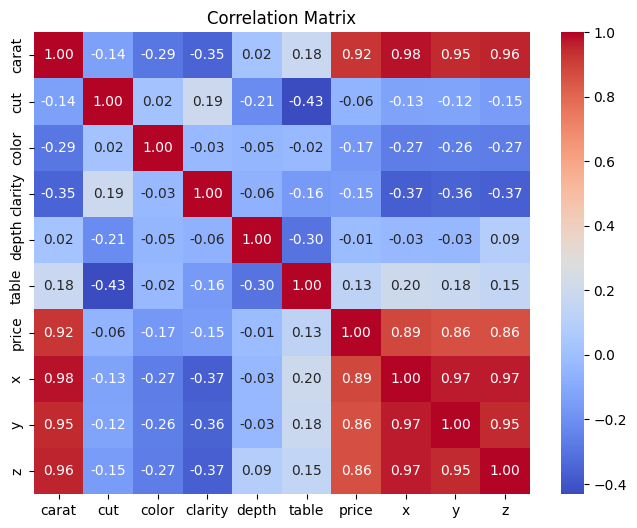

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(label_encoded_data.corr(), annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix')
plt.show()

# Scaling + handling outliers

In [ ]:
#removing the outliers for columns like cart , table , x , price , y , z
def remove_outliers_iqr(df, multiplier = 2):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - multiplier * iqr
    upper_bound = q3 + multiplier * iqr
    return df[(df >= lower_bound) & (df <= upper_bound)]

outlier_columns=["carat","table","x","y","z","price"]
label_encoded_data = remove_outliers_iqr(label_encoded_data[outlier_columns])
one_hot_data[outlier_columns] = remove_outliers_iqr(label_encoded_data[outlier_columns])

In [ ]:
label_encoded_data=label_encoded_data.fillna(label_encoded_data.median())
label_encoded_data.isna().sum()

carat    0
table    0
x        0
y        0
z        0
price    0
dtype: int64

In [ ]:
one_hot_data=one_hot_data.fillna(one_hot_data.median())
one_hot_data.isna().sum()

clarity_I1       0
clarity_IF       0
clarity_SI1      0
clarity_SI2      0
clarity_VS1      0
clarity_VS2      0
clarity_VVS1     0
clarity_VVS2     0
color_D          0
color_E          0
color_F          0
color_G          0
color_H          0
color_I          0
color_J          0
cut_Fair         0
cut_Good         0
cut_Ideal        0
cut_Premium      0
cut_Very Good    0
carat            0
depth            0
table            0
price            0
x                0
y                0
z                0
dtype: int64

In [ ]:
#standard scaling
from sklearn.preprocessing import StandardScaler
scaler_std = StandardScaler()
label_encoded_data_stdscaling = scaler_std.fit_transform(label_encoded_data)
label_encoded_data_stdscaling = pd.DataFrame(label_encoded_data_stdscaling, columns=label_encoded_data.columns)

one_hot_data_stdscaling = scaler_std.fit_transform(one_hot_data)
one_hot_data_stdscaling = pd.DataFrame(one_hot_data_stdscaling, columns=one_hot_data.columns)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mm_scaler= MinMaxScaler()
label_encoded_data_minmaxscaling = pd.DataFrame(mm_scaler.fit_transform(label_encoded_data), columns=label_encoded_data.columns)
one_hot_data_minmaxscaling = pd.DataFrame(mm_scaler.fit_transform(one_hot_data), columns=one_hot_data.columns)


# spliting the data

In [ ]:
attributes_1=label_encoded_data_stdscaling.drop(['price' , 'x' , 'y' , 'z'],axis=1)
labels_1 = label_encoded_data_stdscaling['price']

attributes_2=one_hot_data_stdscaling.drop(['price' , 'x' , 'y' , 'z'],axis=1)
labels_2 = one_hot_data_stdscaling['price']

attributes_3=label_encoded_data_minmaxscaling.drop(['price' , 'x' , 'y' , 'z'],axis=1)
labels_3 = label_encoded_data_minmaxscaling['price']

attributes_4=one_hot_data_minmaxscaling.drop(['price' , 'x' , 'y' , 'z'],axis=1)
labels_4 = one_hot_data_minmaxscaling['price']

attributes_5=data_xgb.drop(['price' , 'x' , 'y' , 'z'],axis=1)
labels_5 =  data_xgb['price']

In [ ]:
#attributes_train, attributes_test,labels_train,labels_test = train_test_split(attributes_1, labels_1, test_size=0.2, random_state=42)
# attributes_train, attributes_test,labels_train,labels_test = train_test_split(attributes_scaled, labels, test_size=0.2, random_state=42)
attributes_train, attributes_test,labels_train,labels_test = train_test_split(attributes_5, labels_5, test_size=0.2, random_state=42)
# attributes_train, attributes_test,labels_train,labels_test = train_test_split(attributes_scaled, labels, test_size=0.2, random_state=42)

# Applying the models

In [ ]:
attributes_1.isna().sum()

carat    0
table    0
dtype: int64

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score


lin_reg = LinearRegression()
lin_scores = cross_val_score(lin_reg, attributes_3, labels_3, scoring ="neg_mean_squared_error",cv = 10)

tree_reg = DecisionTreeRegressor()
tree_scores = cross_val_score(tree_reg, attributes_3, labels_3, scoring ="neg_mean_squared_error",cv = 10)

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rorest_scores = cross_val_score(forest_reg, attributes_3, labels_3, scoring ="neg_mean_squared_error",cv = 10)

svr_reg = SVR(kernel="linear")
svr_scores = cross_val_score(svr_reg, attributes_3, labels_3, scoring ="neg_mean_squared_error",cv = 10)

kN_reg = KNeighborsRegressor()
kn_scores = cross_val_score(kN_reg, attributes_3, labels_3, scoring ="neg_mean_squared_error",cv = 10)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr.fit(attributes_train, labels_train)
y_pred = gbr.predict(attributes_test)
gbr_rmse =np.sqrt( mean_squared_error(labels_test, y_pred))

# Rmse

In [ ]:
lin_rmse_scores = np.sqrt(-lin_scores)
lin_rmse_scores.mean()

0.15781330735745108

In [ ]:
tree_rmse_scores = np.sqrt(-tree_scores)
tree_rmse_scores.mean()

0.17910362151541265

In [ ]:
forest_rmse_scores = np.sqrt(-rorest_scores)
forest_rmse_scores.mean()

0.1312342354509672

In [ ]:
svr_rmse_scores = np.sqrt(-svr_scores)
svr_rmse_scores.mean()

0.16394394489247763

In [ ]:
kn_rmse_scores = np.sqrt(-kn_scores)
kn_rmse_scores.mean()

0.14111973840234593

In [ ]:
gbr_rmse

726.1178636998937

# Testing on the test file

In [ ]:
final_data = data_test.copy()
final_data.isna().sum()

Id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
dtype: int64

In [ ]:
final_data = column_transformer.fit_transform(final_data)
# Get feature names
cc = column_transformer.named_transformers_['cat'].get_feature_names_out(['clarity', 'color','cut'])
nn = ['carat' ,  'depth' , 'table', 'price','x','y','z' ]
dd = list(cc)+nn

final_data = pd.DataFrame(final_data, columns=dd)

In [ ]:
final_data.drop(["x","y","z","price"],axis=1,inplace=True)
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10788 entries, 0 to 10787
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   clarity_I1     10788 non-null  float64
 1   clarity_IF     10788 non-null  float64
 2   clarity_SI1    10788 non-null  float64
 3   clarity_SI2    10788 non-null  float64
 4   clarity_VS1    10788 non-null  float64
 5   clarity_VS2    10788 non-null  float64
 6   clarity_VVS1   10788 non-null  float64
 7   clarity_VVS2   10788 non-null  float64
 8   color_D        10788 non-null  float64
 9   color_E        10788 non-null  float64
 10  color_F        10788 non-null  float64
 11  color_G        10788 non-null  float64
 12  color_H        10788 non-null  float64
 13  color_I        10788 non-null  float64
 14  color_J        10788 non-null  float64
 15  cut_Fair       10788 non-null  float64
 16  cut_Good       10788 non-null  float64
 17  cut_Ideal      10788 non-null  float64
 18  cut_Pr

In [ ]:
#submission=data_test['Id']
forest_reg.fit(attributes_5,labels_5)
predictions=forest_reg.predict(final_data)


In [ ]:
#submission['price'] = predictions
submission = pd.DataFrame({'Id': data_test['Id'],'price': predictions})

submission.head()

,Id,price
0,1,8602.245500
1,2,16246.283333
2,3,17505.770000
3,4,15446.230000
4,5,16675.015000


In [ ]:
submission.to_csv('submission.csv',index=None)